## Aim : To classify whether a credit card transaction is fraudulent or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data = pd.read_csv('./creditcard.csv')
data.shape

(284807, 31)

## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
### checking for duplicated

data.duplicated().sum()

1081

In [8]:
## Removing of duplicated data
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='count'>

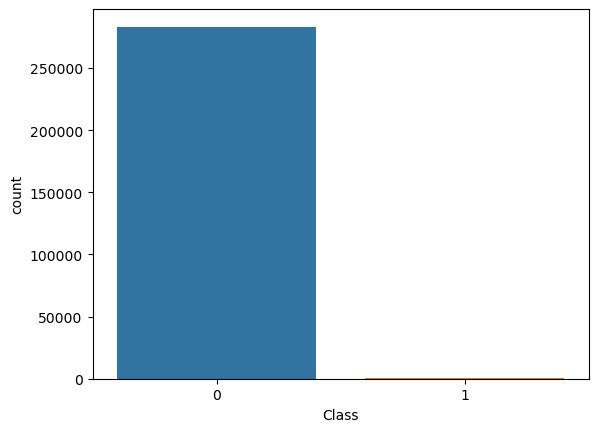

In [15]:
sns.countplot(data,x="Class")

In [17]:
correlations = data.iloc[:,:-1].corr(method="pearson")

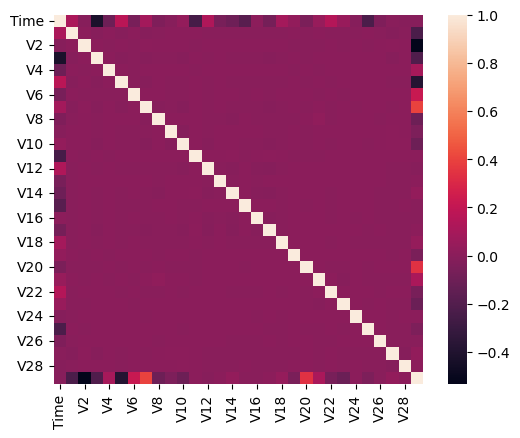

In [20]:
sns.heatmap(correlations,square=True,cbar=True);

In [21]:
correlations

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123


#### There are too many variables so we have to find the most relevant for the model. 

### ANOVA test

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

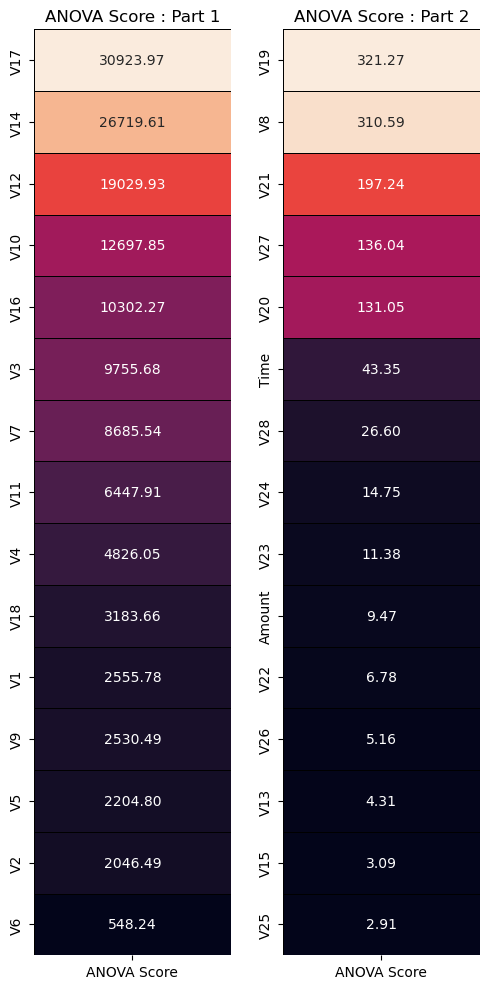

In [27]:
features = data.iloc[:,:-1]
target = data.iloc[:,-1]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

from this plot, we can see that variables with high score are more important for the target so we will keep those with scores grether than 150

In [49]:
indexes = featureScores.index[:18].tolist()
indexes.append('Class')
AnovaVariables = data[indexes]
AnovaVariables

,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18,V1,V9,V5,V2,V6,V19,V8,V21,Class
0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,-0.551600,1.378155,0.025791,-1.359807,0.363787,-0.338321,-0.072781,0.462388,0.403993,0.098698,-0.018307,0
1,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,1.612727,0.448154,-0.183361,1.191857,-0.255425,0.060018,0.266151,-0.082361,-0.145783,0.085102,-0.225775,0
2,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,0.624501,0.379780,-0.121359,-1.358354,-1.514654,-0.503198,-1.340163,1.800499,-2.261857,0.247676,0.247998,0
3,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,-0.226487,-0.863291,1.965775,-0.966272,-1.387024,-0.010309,-0.185226,1.247203,-1.232622,0.377436,-0.108300,0
4,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.822843,0.403034,-0.038195,-1.158233,0.817739,-0.407193,0.877737,0.095921,0.803487,-0.270533,-0.009431,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.991691,4.626942,2.711941,4.356170,1.107641,-9.834783,-4.918215,-1.593105,-2.066656,0.510632,-11.881118,1.914428,-5.364473,10.071785,-2.606837,-0.682920,7.305334,0.213454,0
284803,-0.025693,-0.675143,0.915802,-0.975926,-0.711757,2.035030,0.024330,-0.150189,-0.738589,-1.221179,-0.732789,0.584800,0.868229,-0.055080,1.058415,-1.545556,0.294869,0.214205,0
284804,0.313502,-0.510602,0.063119,-0.484782,0.140716,-3.249640,-0.296827,0.411614,-0.557828,0.395652,1.919565,0.432454,2.630515,-0.301254,3.031260,-0.577252,0.708417,0.232045,0
284805,0.509928,0.449624,-0.962886,-0.399126,-0.608577,0.702510,-0.686180,-1.933849,0.689799,1.113981,-0.240440,0.392087,-0.377961,0.530483,0.623708,2.897849,0.679145,0.265245,0


## Modeling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [55]:
X_train,X_test,y_train,y_test = train_test_split(AnovaVariables.iloc[:,:-1].values,AnovaVariables.iloc[:,-1].values,test_size=.2,random_state=42)

### Classification with SVM

In [51]:
clf_svm = SVC(kernel = 'linear',C = 0.1)

In [56]:
%%time
clf_svm.fit(X_train,y_train)

CPU times: total: 20min 25s
Wall time: 23min 47s


SVC(C=0.1, kernel='linear')

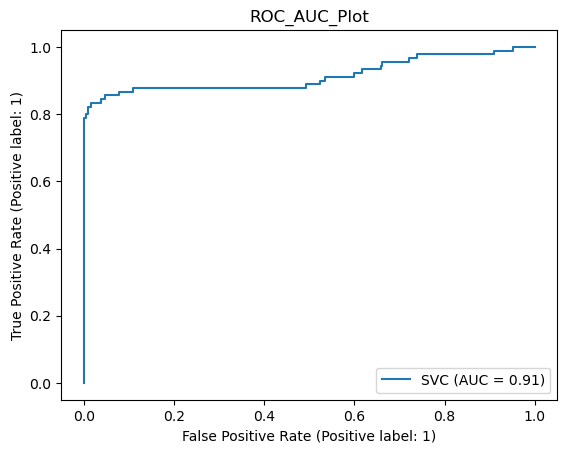

In [63]:
plot_roc_curve(clf_svm, X_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

In [65]:
cm = confusion_matrix(y_test,clf_svm.predict(X_test))


<Axes: >

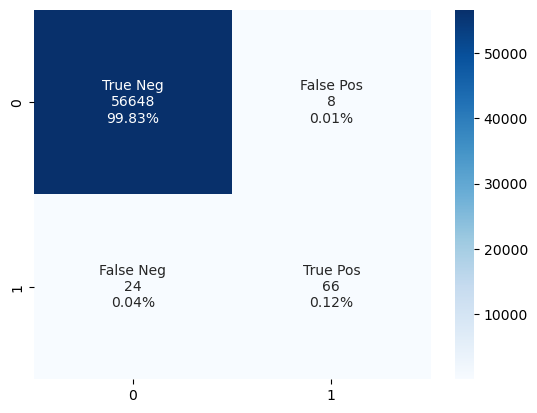

In [67]:
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

In [69]:
preds = clf_svm.predict(X_test)
score = accuracy_score(y_test,preds)


In [73]:
print(f"Accuracy: {score*100:.2f}")

Accuracy: 99.94


In [74]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [76]:
rfc_clf = rfc(max_depth=20,n_jobs=-1,n_estimators=100)

In [77]:
rfc_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1)

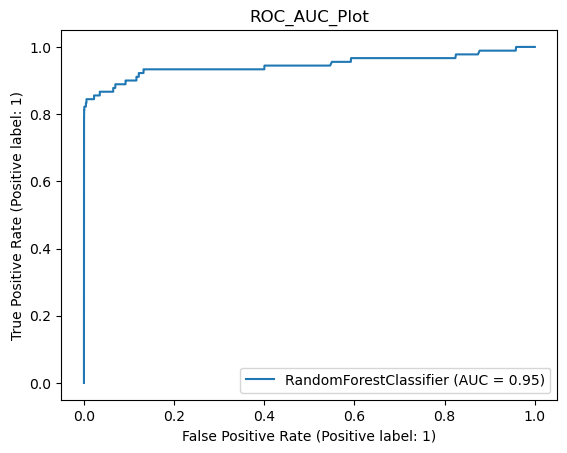

In [78]:
plot_roc_curve(rfc_clf, X_test,y_test)
plt.title('ROC_AUC_Plot')
plt.show()

In [82]:
preds_rfc = rfc_clf.predict(X_test)
score = accuracy_score(y_test,preds_rfc)

In [83]:
print(f"Accuracy: {score*100:.2f}")

Accuracy: 99.95


<Axes: >

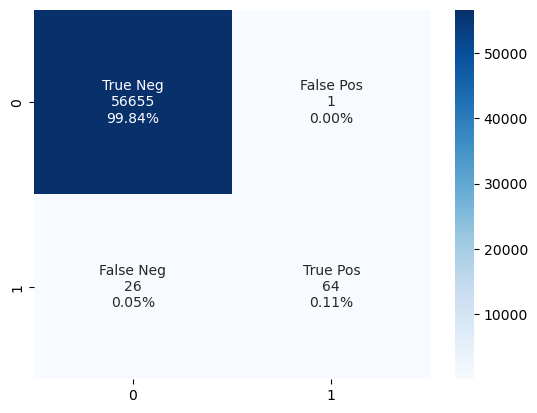

In [84]:
cm = confusion_matrix(y_test,preds_rfc)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')